In [ ]:
""" as a proof of concept, do on simplest dataset, single strokes, to show that can do model comparison and
figure out what I already know, thatn directions of strokes are strongly biased in a particular direction.
This needs to work before can try more complex things.

"""

In [8]:
%load_ext autoreload
%autoreload 2

from tools.utils import * 
from tools.plots import *
from tools.analy import *
from tools.calc import *
from tools.analyplot import *
from pythonlib.drawmodel.analysis import *
from pythonlib.tools.stroketools import *


NOTE: need to not overwrite strokes_all_task, because then the orders saved will stop being accurate. Modify
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
animal = "Pancho";
date = 200226
expt = "pilot"
session = 1

from tools.preprocess import *
filedata = loadSingleData(animal, date, expt, session, resave_as_dict=False, load_resaved_data=True, 
                      resave_overwrite=False)

found one matching filename: ['/data2/animals/Pancho/200226/200226_121930_pilot_Pancho_1.h5']
found one matching filename: ['/data2/animals/Pancho/200226/200226_121930_pilot_Pancho_1.pkl']
-- loaded presaved data: /data2/animals/Pancho/200226/200226_121930_pilot_Pancho_1.pkl


In [210]:
targ = {
    "task_stage":["line"],
    "fracsuccess_min":[0.5]
}

trials_list = getIndsTrials(filedata, targ)
trials_list = removeRedundantTrials(filedata, trials_list)

got 76 total trials
THIS NOT OPTIMAL - see notes. is ok if same tasks always occur in direct succession chron order.
started with 76 trials
ended with 75 trials


In [275]:
## ============== function to prepare strokes and stuff to put into model and behavior objects

from pythonlib.tools.stroketools import standardizeStrokes


strokes = standardizeStrokes(strokes)
print(strokes[0])
    

[[-0.3452381  -0.91666667  4.096     ]
 [-0.3452381  -0.91666667  4.1       ]
 [-0.3452381  -0.91666667  4.104     ]
 [-0.3452381  -0.91666667  4.108     ]
 [-0.3452381  -0.91666667  4.112     ]
 [-0.3452381  -0.91666667  4.116     ]
 [-0.3452381  -0.91666667  4.12      ]
 [-0.3452381  -0.91666667  4.124     ]
 [-0.3452381  -0.91666667  4.128     ]
 [-0.3452381  -0.91666667  4.132     ]
 [-0.3452381  -0.91666667  4.136     ]
 [-0.3452381  -0.91666667  4.14      ]
 [-0.3452381  -0.91666667  4.144     ]
 [-0.3452381  -0.91666667  4.148     ]
 [-0.3452381  -0.91666667  4.152     ]
 [-0.3452381  -0.91666667  4.156     ]
 [-0.3452381  -0.91666667  4.16      ]
 [-0.3452381  -0.91666667  4.164     ]
 [-0.3452381  -0.91666667  4.168     ]
 [-0.3452381  -0.91666667  4.172     ]
 [-0.3452381  -0.91666667  4.176     ]
 [-0.3452381  -0.91666667  4.18      ]
 [-0.3452381  -0.91666667  4.184     ]
 [-0.3452381  -0.91666667  4.188     ]
 [-0.3452381  -0.91666667  4.192     ]
 [-0.3452381  -0.91666667

In [ ]:
# given set of strokes, compute distance traveled
from pythonlib.tools.stroketools import computeDistTraveled

# def computeDistTraveled(strokes, origin, include_lift_periods=True):
#     """ assume start at origin. assumes straight line movements.
#     by default includes times when not putting down ink.
#     IGNORES third column(time) - i.e., assuems that datpoints are in 
#     chron order."""
    
#     O = np.array(origin, origin, origin)
#     assert O.shape==[3,2]
    
#     strokes.insert(0, O)
    
#     cumdist = 0
#     dists = []
#     for i, S1, S2 in enumerate(zip(strokes[:-1], strokes[1:])):
#         dists.append(np.linalg.norm(S2[0,[0,1]] - S1[-1,[0,1]]))
#         dists.append(np.linalg.norm(S2[-1,[0,1]] - S2[0,[0,1]]))
#     print(dists)
    
    

            
            
            
        

In [211]:
from pythonlib.drawmodel.analysis import makeDataset

# def makeDataset(filedata, trials_list):
#     """ helper to maek a Dataset object with the trials included here"""
#     # 1) behavior
#     strokes_all = getMultTrialsStrokes(filedata, trials_list)

#     # 2) task
#     tasks = [getTrialsTask(filedata, t) for t in trials_list]
#     fix_all_task = [getTrialsFix(filedata, t)["fixpos_pixels"] for t in trials_list]
#     strokes_all_task = [getTrialsTaskAsStrokes(filedata, t, fake_timesteps="from_orig") for t in trials_list]
#     for strokes, t, f in zip(strokes_all_task, tasks, fix_all_task):
#         t["strokes"] = strokes
#         t["fixpos"] = f
        
#     dset = Dataset(strokes_all, tasks)
#     return dset


    

In [212]:
def _run(prior_ver, likeli_ver="split_segments", posterior_ver="weighted", title=""):
    dset = makeDataset(filedata, trials_list)
    priorFunction, NORM_VER = makePriorFunction(ver=prior_ver)
    likeliFunction = makeLikeliFunction(ver=likeli_ver)
    mod = Model(modelname, priorFunction, likeliFunction)
    dset.applyModel(mod, prior_ver= NORM_VER, posterior_ver=posterior_ver)
    dset.plotPosteriorHist()
    plt.title(title)
    return dset

[getTrialsStrokes] removing stroke for calc vel since shorter than window
NOTE: should get parses in both directions [default for getParses()], since this distance function cares about the chron order.
[getTrialsStrokes] removing stroke for calc vel since shorter than window
NOTE: should get parses in both directions [default for getParses()], since this distance function cares about the chron order.
[getTrialsStrokes] removing stroke for calc vel since shorter than window
NOTE: should get parses in both directions [default for getParses()], since this distance function cares about the chron order.
[getTrialsStrokes] removing stroke for calc vel since shorter than window
NOTE: should get parses in both directions [default for getParses()], since this distance function cares about the chron order.
[getTrialsStrokes] removing stroke for calc vel since shorter than window
NOTE: should get parses in both directions [default for getParses()], since this distance function cares about the chr

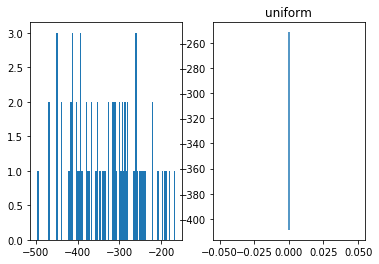

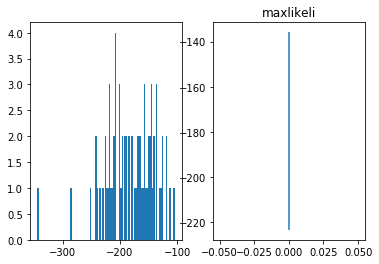

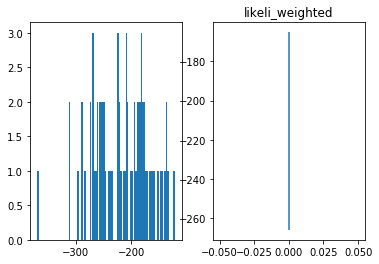

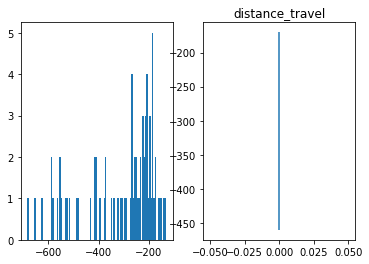

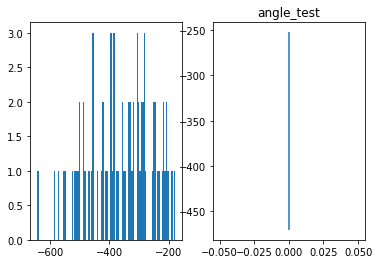

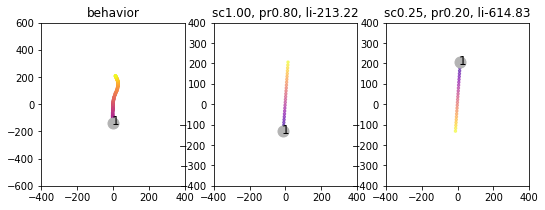

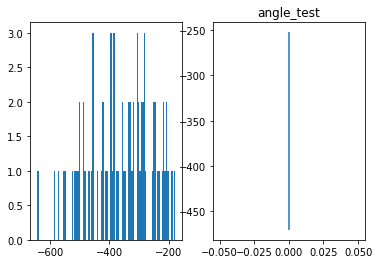

In [240]:
# 1) random model
_run("uniform", "split_segments", "weighted", "uniform")

# 2) positive control model [max likelis]
_run("uniform", "split_segments", "maxlikeli", "maxlikeli")


# 3) positive control model [weigh likelis by softmax(likelis)
_run("uniform", "split_segments", "likeli_weighted", "likeli_weighted")


# 4) Hypothesis: distance finger travel
dset = _run("distance_travel", title="distance_travel")

# 5) Hypothesis, angle bias
dset = _run("angle_test", title="angle_test")

dset.plotExampleTrial(3)

# 5) Hypothesis, angle bias
dset = _run("angle_test", title="angle_test")